In [1]:
# 필요한 라이브러리 및 모듈

import numpy as np
import cv2
import butter
from matplotlib import pyplot as plt

In [2]:
# 1. Read Video file

# generate video object
filename = "./input/original_video_SR30.mp4"
cap = cv2.VideoCapture(filename)

In [3]:
# 2. Gray Scale로 변환

# 첫번째 프레임 읽기
ret, frame = cap.read()

# 영상의 사이즈 확인
frame_size = frame.shape
print("Shape of image is : ",frame.shape)

# Gray Sacle 이미지로 변환
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
print("Shape of image is : ",gray.shape)

Shape of image is :  (256, 640, 3)
Shape of image is :  (256, 640)


In [ ]:
# J = imadjust(I,[low_in high_in])은 low_in과 high_in 사이의 값이 0과 1 사이의 값에 매핑되도록 I의 명암 값을 J의 새 값에 매핑합니다.
# J = imadjust(I)는 회색조 영상 I의 명암 값을 J의 새 값에 매핑합니다. 기본적으로 imadjust는 
# 모든 픽셀 값의 하위 1%와 상위 1%를 포화(saturate) 처리합니다. 이렇게 하면 출력 영상 J의 대비가 증가합니다.

hist_cv = cv2.calcHist([gray],[0],None,[256],[0,256])

In [ ]:
img_cv_eq = cv2.equalizeHist(gray)
plt.imshow(img_cv_eq, cmap = 'gray')

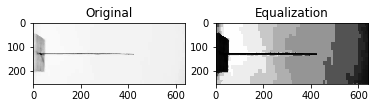

In [27]:
# hist_np 에 들어가는 값 : index = intensity, hist_np[i] = intensity 가 i인 픽셀의 갯수
hist_np, bins = np.histogram(gray.flatten(), 256,[0,256])

# cumsum : cdf[i] = sum(hist_np[0:i])
cdf = hist_np.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
# --로 변환되는 부분의 의미는??
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf - cdf.min())*255/(cdf.max()-cdf.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[gray]
plt.subplot(121),plt.imshow(gray, cmap = 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(img2, cmap = 'gray'),plt.title('Equalization')
plt.show()

In [10]:
cdf.shape

(256,)

In [12]:
hist_np, bins = np.histogram(gray.flatten(), 256,[0,256])

In [26]:
#print(hist_np)
#print(hist_np.shape)
cdf = hist_np.cumsum()
print(cdf)
cdf_m = np.ma.masked_equal(cdf,0)
print(cdf_m)
print(cdf_m.shape)
print(cdf_m - cdf)
print(cdf_m[0])

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      1      2      2      2      2      4
      4      6      9     12     12     12     14     14     16     19
     20     27     32     37     37     40     51     66     82     91
    111    128    128    138    150    172    183    192    199    199
    215    238    245    268    286    304    304    316    336    360
    374    382    397    397    407    417    427    441    453    463
    463    472    482    497    514    537    559    559    583    596
    618    633    654    669    669    692    710    726    751    787
    81

In [39]:
ratio = cdf / cdf.max()
print(ratio)
ratio_high = ratio > 0.99
print(ratio_high)
print(ratio_high.find(True))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

AttributeError: 'numpy.ndarray' object has no attribute 'find'

In [19]:
a = np.array([[1, 2, 3],[4, 5, 6]])
#print(a)
b = gray.flatten()
print(b)
print(b.shape)
print(640*256)

[236 236 236 ... 218 220 220]
(163840,)
163840


In [ ]:
# pyramid 안쓰고, resize함수로 피라미드 정의

def pyramidDown(input):
    # input is numpy array
    heigh, width = input.shape
    #output = np.zeros((size[0]//2, size[1]//2))
    blur = cv2.GaussianBlur(input, (5,5), 0)
    output = cv2.resize(input, None, fx = 0.5, fy = 0.5)
    return output

def pyramidUp(input):
    # input is numpy array
    heigh, width = input.shape
    #output = np.zeros((size[0]//2, size[1]//2))
    output = cv2.resize(input, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC) #interpolatino 수정 바람
    return output


In [ ]:
# 3. Pyramid
# 모든 프레임에 대해 과정3 적용
Gau_seq = [[],[],[],[],[],[]]
Lap_seq = [[],[],[],[],[],[]]

while ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Normalize intensity
    gray = gray.astype('float32')
    gray = gray / 255
    
    Gau = [gray]
    Down = pyramidDown(gray)
    Gau.append(Down)

    for i in range (0, 6):
        Down = pyramidDown(Down)
        Gau.append(Down)
    
    Gau_copy = []
    Gau_copy[:] = Gau
    Gau_copy.reverse()
    
    for i in range (0,6):
        Gau_seq[i].append(Gau_copy.pop())

    Lap = []
    for i in range (0, 6):
        Up = pyramidUp(Gau.pop())
        Lap.append(Up - Gau[len(Gau)-1])

    #Lap.reverse()
    
    for i in range (0,6):
        Lap_seq[i].append(Lap.pop())
    ret, frame = cap.read()

In [ ]:
print(Gau_seq[0][0])
f = open('GaussianPramid_L0_0_change1.csv', 'a')
np.savetxt(f, Gau_seq[0][0], delimiter=",", fmt='%s',  newline='\n')

# 최대 0.2 까지 오차 발생함 = uint8에서 50까지 밝기값 차이가 발생함;

In [ ]:
# 4. 확대 주파수 결정 및 필터링
# Parameter Initializing 

SR = 2200 # SR is Sampling Rate
Fn = SR/2
T = 1/SR # T is Period
Low_freq = 350
High_freq = 370
alpha = 100.0

In [ ]:
# 4.5 연산을 위해 0~1 사이의 부동소수점으로 변환
'''
for i in range(0, 3):
    for j in range(0, 101):
        Lap_seq[i][j] = Lap_seq[i][j].astype('float64')
        Lap_seq[i][j] = Lap_seq[i][j]/255'''

In [ ]:
# pyramid data 저장
'''
f = open('LaplacianPramid_L0_0.csv', 'a')

np.savetxt(f, np.column_stack((Lap_seq[0][0])), delimiter=",", fmt='%s',  newline='\n')'''

In [ ]:
# 원하는 주파수 선택적으로 확대 
import time
start = time.time()
f=open('python_bandpass.csv','a')

# level 0
for i in range (0, frame_size[0]):
    for j in range (0, frame_size[1]):
        time_stack = []
        
        for k in range (0, 101):
            time_stack.append(Lap_seq[0][k][i][j])
            
        time_stack = butter.butter_bandpass_filter(time_stack, Low_freq, High_freq, SR, order=5)
        #np.savetxt(f, np.column_stack(time_stack), delimiter=",", fmt='%s',  newline='\n')
        for k in range (0, 101):
            Lap_seq[0][k][i][j] += alpha * time_stack[k]
            
end = time.time()
delay = end - start
print("1st level : ", delay)

In [ ]:
# level 1 
start = time.time()
for i in range (0, Lap_seq[1][0].shape[0]):
    for j in range (0, Lap_seq[1][0].shape[1]):
        time_stack = []
        
        for k in range (0, 101):
            time_stack.append(Lap_seq[1][k][i][j])
            
        time_stack = butter.butter_bandpass_filter(time_stack, Low_freq, High_freq, SR, order=5)
        
        for k in range (0, 101):
            Lap_seq[1][k][i][j] += alpha * time_stack[k]
            
end = time.time()
delay = end - start
print("2nd level : ", delay)

In [ ]:
# level 2
start = time.time()

for i in range (0, Lap_seq[2][0].shape[0]):
    for j in range (0, Lap_seq[2][0].shape[1]):
        time_stack = []
        
        for k in range (0, 101):
            time_stack.append(Lap_seq[2][k][i][j])
            
        time_stack = butter.butter_bandpass_filter(time_stack, Low_freq, High_freq, SR, order=5)
        
        for k in range (0, 101):
            Lap_seq[2][k][i][j] += time_stack[k]
            
end = time.time()
delay = end - start
print("3nd level : ", delay)

In [ ]:
# 변환했던 부동소수점 데이터를 다시 정수로 변환

for i in range(0, 3):
    for j in range(0, 101):
        Lap_seq[i][j] *= 255
        Lap_seq[i][j] = Lap_seq[i][j].astype('uint8')

for i in range(0, 3):
    for j in range(0, 101):
        Gau_seq[i][j] *= 255
        Gau_seq[i][j] = Gau_seq[i][j].astype('uint8')
        

In [ ]:
# 5. 동영상으로 저장하기
# 영상 스택 쌓기

Rec2= []
for i in range (0, 101):
    Rec2.append( Lap_seq[2][i] + Gau_seq[2][i])

for i in range (0, 101):
    Rec2[i] = cv2.pyrUp(Rec2[i])

Rec1 = []
for i in range (0, 101):
    Rec1.append( Lap_seq[1][i] + Rec2[i] )

for i in range (0, 101):
    Rec1[i] = cv2.pyrUp(Rec1[i])

Rec0 = []
for i in range (0, 101):
    Rec0.append( Lap_seq[0][i] + Rec1[i] )

In [ ]:
# Output 파일 생성 

size = Rec0[0].shape

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('./output/' + 'alpha_' + str(alpha) + 'output.mp4', fourcc, 30.0, (640, 256), isColor = False)

for i in range (0, len(Rec0)):
    #out.write(cv2.cvtColor(Rec0[i], cv2.COLOR_GRAY2RGB))
    out.write(Rec0[i])
#    cv2.imshow('frame', Rec0[i])
#    if cv2.waitKey(0) & 0xFF == ord('q'):
#            break

#cv2.destroyAllWindows()
            
out.release()

print("done")
print(size)

In [ ]:
cv2.imshow('ad', Lap_seq[1][1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 3. Pyramid
# 한 프레임에 먼저 해보기

'''
Gau = [gray]
Down = cv2.pyrDown(gray)
Gau.append(Down)

for i in range (0, 5):
    Down = cv2.pyrDown(Down)
    Gau.append(Down)

Gau_copy = []
Gau_copy[:] = Gau
Gau_copy.reverse()

# 이미지를 sequential하게 저장
Gau_seq = [[],[],[],[],[],[]]
for i in range (0,6):
    Gau_seq[i].append(Gau_copy.pop())
    
Lap = []
for i in range (0, 6):
    Up = cv2.pyrUp(Gau.pop())
    Lap.append(Up - Gau[len(Gau)-1])
    
#Lap.reverse()

Lap_seq = [[],[],[],[],[],[]]
for i in range (0,6):
    Lap_seq[i].append(Lap.pop())'''

In [ ]:
# 모든 프레임에 대해 적용
'''
while ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #hist = cv2.equalizeHist(gray)
    
    Gau = [gray]
    Down = cv2.pyrDown(gray)
    Gau.append(Down)

    for i in range (0, 5):
        Down = cv2.pyrDown(Down)
        Gau.append(Down)
    
    Gau_copy = []
    Gau_copy[:] = Gau
    Gau_copy.reverse()
    
    for i in range (0,6):
        Gau_seq[i].append(Gau_copy.pop())

    Lap = []
    for i in range (0, 6):
        Up = cv2.pyrUp(Gau.pop())
        Lap.append(Up - Gau[len(Gau)-1])

    #Lap.reverse()
    
    for i in range (0,6):
        Lap_seq[i].append(Lap.pop())
    ret, frame = cap.read()'''

In [ ]:
# 3. 부동소수점 데이터로 먼저 변환
'''
for i in range(0, 3):
    for j in range(0, 101):
        Lap_seq[i][j] = Lap_seq[i][j].astype('float64')
        Lap_seq[i][j] = Lap_seq[i][j]/255'''